## Housekeeping

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!pip install pandas_datareader pandas
!pip install yfinance

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas_datareader import data as web
import datetime
import yfinance as yf
import matplotlib.pyplot as plt

## Exploratory Data Analysis and Data Preprocessing

In [57]:
exog_var = pd.read_csv('/content/gdrive/MyDrive/combined_data.csv', index_col='DATE', parse_dates=True)
exog_var.drop(exog_var.tail(2).index, inplace = True)
exog_var.tail()

,TB3MS,UMCSENT,DXYNYB,SPX return,DJIA return,PPIACO,UNRATE,M1SL,BAMLC0A4CBBBEY,DGS5,...,DGS10,WM2NS,CSUSHPINSA,CPIAUCSL,T10Y2Y,MPRIME,ICSA,EFFR,CBOE SP500 Call Volume,CBOE SP500 Put Volume
DATE,,,,,,,,,,,,,,,,,,,,,
2023-02-01,0.024229,0.032357,0.027130,-0.026112,-0.041933,-0.005987,0.058824,-0.012365,0.031632,0.082104,...,0.060978,-0.007980,0.002107,0.003700,0.163968,0.032000,0.095238,0.054333,-0.016325,0.032322
2023-03-01,0.008602,-0.074627,-0.022504,0.035052,0.018907,-0.006213,-0.027778,-0.019406,0.024464,-0.030092,...,-0.022365,-0.003727,0.013109,0.000530,-0.187175,0.010336,0.107551,0.019228,0.068763,0.071659
2023-04-01,0.049041,0.024194,-0.008194,0.014642,0.024764,-0.000599,-0.028571,-0.018148,-0.046412,-0.074926,...,-0.055430,-0.006567,0.013938,0.003678,-0.130659,0.023018,-0.020661,0.038030,-0.074947,-0.082041
2023-05-01,0.044715,-0.067717,0.026065,0.002482,-0.034896,-0.012604,0.088235,-0.001344,0.034575,0.015370,...,0.032843,-0.009278,0.013133,0.001241,0.003924,0.028750,-0.030591,0.044702,0.050325,0.010791
2023-06-01,0.003891,0.087838,-0.013516,0.064727,0.045561,0.000938,-0.027027,-0.003387,0.026221,0.099728,...,0.048818,0.003830,0.009479,0.001804,0.597022,0.002430,0.117519,0.005907,0.304119,0.197909


In [58]:
#combined_data.drop(columns = ['BAMLC0A4CBBBEY','BAMLC0A4CBBB','CSUSHPINSA','EFFR'], axis=1, inplace=True)

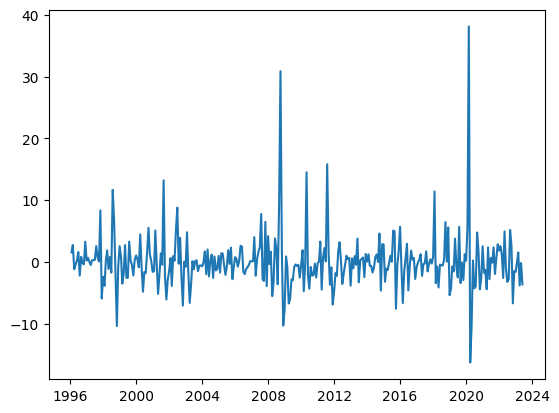

In [119]:
vix = pd.read_csv('/content/gdrive/MyDrive/VIXCLS.csv', index_col='DATE', parse_dates=True)
vix = vix.drop(vix.index[-1])
vix['VIXCLS'] = vix['VIXCLS'].diff()
vix.drop(vix.tail(2).index, inplace = True)
plt.plot(vix)

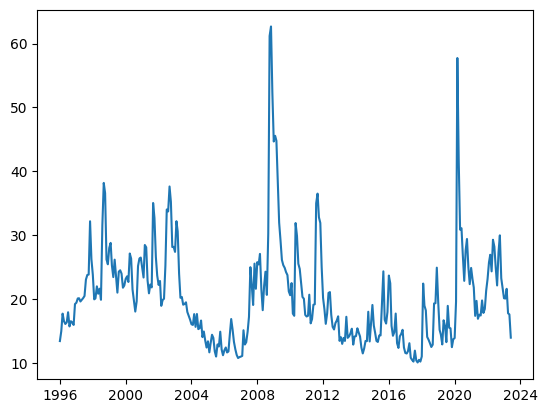

In [120]:
vix_data = pd.read_csv('/content/gdrive/MyDrive/VIXCLS.csv', index_col='DATE', parse_dates=True)
vix_data.drop(vix_data.tail(3).index, inplace = True)
plt.plot(vix_data)

In [60]:
!pip install statsmodels
!pip install arch

In [121]:
combined_data = exog_var.copy()
combined_data['VIX'] = vix
combined_data = combined_data.drop(combined_data.index[-1])
combined_data.drop(combined_data.tail(2).index, inplace = True)
combined_data.tail()

,TB3MS,UMCSENT,DXYNYB,SPX return,DJIA return,PPIACO,UNRATE,M1SL,BAMLC0A4CBBBEY,DGS5,...,WM2NS,CSUSHPINSA,CPIAUCSL,T10Y2Y,MPRIME,ICSA,EFFR,CBOE SP500 Call Volume,CBOE SP500 Put Volume,VIX
DATE,,,,,,,,,,,,,,,,,,,,,
2022-11-01,0.115591,-0.051753,-0.050031,0.053753,0.056726,-0.007183,-0.027027,-0.006687,-0.038037,-0.029320,...,0.000172,-0.006042,0.002050,0.564496,0.112000,0.055114,0.219156,-0.146928,-0.076491,-6.706623
2022-12-01,0.024096,0.051056,-0.022935,-0.058971,-0.041704,-0.019988,-0.027778,-0.007223,-0.067503,-0.071807,...,0.001967,-0.008436,0.001313,0.097765,0.046043,-0.008941,0.089722,0.000041,-0.015547,-1.514805
2023-01-01,0.068235,0.087102,-0.013717,0.061753,0.028322,0.009035,-0.028571,-0.013375,-0.033908,-0.032220,...,-0.006150,-0.005329,0.005171,0.005382,0.031637,-0.052707,0.058187,0.049965,0.028601,-1.615238
2023-02-01,0.024229,0.032357,0.027130,-0.026112,-0.041933,-0.005987,0.058824,-0.012365,0.031632,0.082104,...,-0.007980,0.002107,0.003700,0.163968,0.032000,0.095238,0.054333,-0.016325,0.032322,-0.048548
2023-03-01,0.008602,-0.074627,-0.022504,0.035052,0.018907,-0.006213,-0.027778,-0.019406,0.024464,-0.030092,...,-0.003727,0.013109,0.000530,-0.187175,0.010336,0.107551,0.019228,0.068763,0.071659,1.523848


<Axes: >

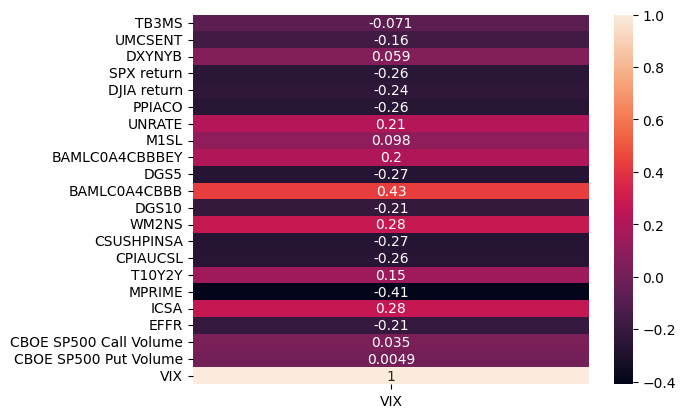

In [62]:
corr_matrix = combined_data.corr()
sns.heatmap(corr_matrix[['VIX']], annot=True)

<Axes: >

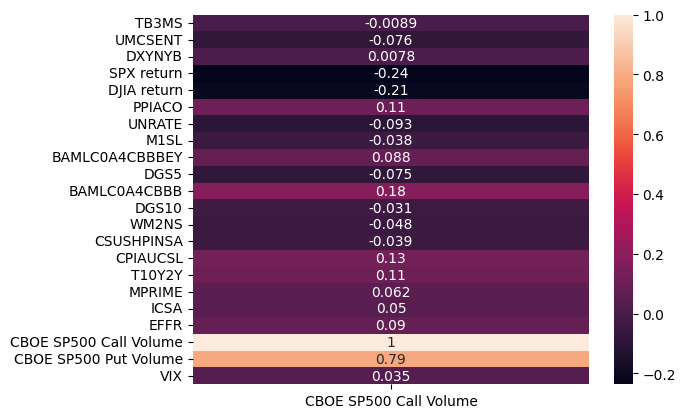

In [63]:
sns.heatmap(corr_matrix[['CBOE SP500 Call Volume']], annot=True)

In [108]:
print(exog_var.shape)
print(vix.shape)
print(vix_data.shape)

(330, 21)
(330, 1)
(330, 1)


In [66]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

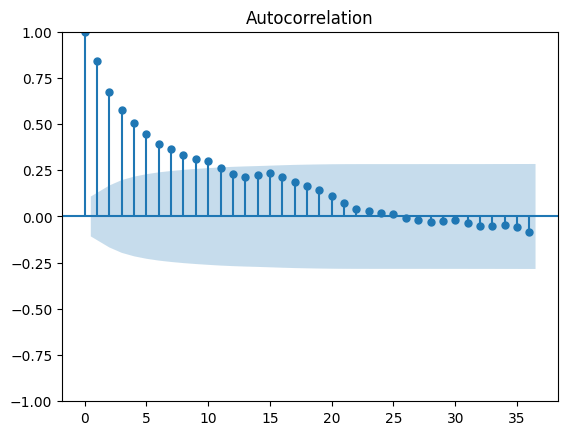

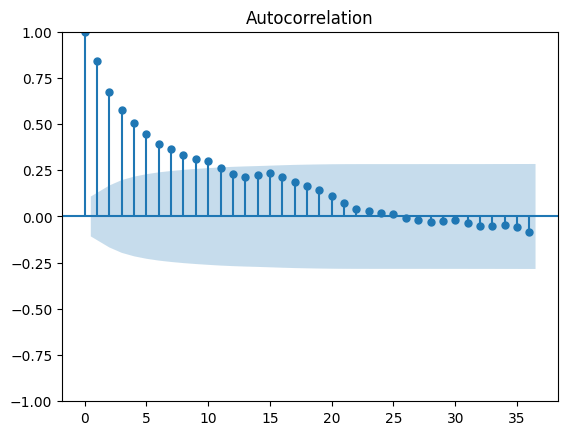

In [67]:
plot_acf(vix_data, lags = 36)

In [68]:
# Perform Dickey-Fuller test
result = adfuller(vix_data)

# Extract and print the results
print('Dickey-Fuller Test Results:')
print(f'Test Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Number of Lags Used: {result[2]}')
print(f'Number of Observations Used: {result[3]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'{key}: {value}')

# Checking to see if differencing is needed
if result[1] <= 0.05:
    print('Result: Reject the null hypothesis. Data is stationary and no differencing is needed')
else:
    print('Result: Fail to reject the null hypothesis. Data is non-stationary and differencing is needed')

Dickey-Fuller Test Results:
Test Statistic: -4.652558596690122
p-value: 0.00010322711322740317
Number of Lags Used: 2
Number of Observations Used: 327
Critical Values:
1%: -3.45050711373316
5%: -2.8704195794076743
10%: -2.571500856923753
Result: Reject the null hypothesis. Data is stationary and no differencing is needed


## GARCH

In [78]:
!pip install pmdarima

In [123]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

In [122]:
def mda(actual, predicted):
    """
    Calculates the Mean Directional Accuracy (MDA) for two time series.

    Parameters:
    actual (array-like): The actual values for the time series.
    predicted (array-like): The predicted values for the time series.

    Returns:
    float: The MDA value.
    """
    actual = np.array(actual)
    predicted = np.array(predicted)

    # calculate the signs of the differences between consecutive values
    actual_diff = np.diff(actual)
    actual_signs = np.sign(actual_diff)
    predicted_diff = np.diff(predicted)
    predicted_signs = np.sign(predicted_diff)

    # count the number of times the signs are the same
    num_correct = np.sum(actual_signs == predicted_signs)

    # calculate the MDA value
    mda = num_correct / (len(actual) - 1)

    return mda


In [124]:
from arch import arch_model
def garch_predict(X, y, z):
    x_train, x_test = train_test_split(X, train_size=0.8)
    y_train, y_test = train_test_split(y, train_size=0.8)
    z_train, z_test = train_test_split(z[1:], train_size=0.8)
    #model
    arima_model = pm.arima.auto_arima (y=y_train, X=x_train, start_p=1, start_q=1,max_p=9, max_d=9, max_q=9, seasonal=False)
    print(arima_model.summary())
    garch_model = arch_model(arima_model.resid(), vol='Garch', p=2, q=1, x=x_train)
    result = garch_model.fit()
    print(result.summary())
    predicted_mu, confit = arima_model.predict(n_periods=y_test.shape[0], return_conf_int=True, X=x_test)
    # Use GARCH to predict the residuals
    garch_forecast = result.forecast(start = y_test.shape[0])
    x_1 = np.sqrt(garch_forecast.variance)
    print(x_1.mean)
    predicted_et = garch_forecast.mean['h.1'].iloc[-1]
    print(predicted_et)
    prediction = predicted_mu + predicted_et
    test_inv = np.add(z.iloc[len(z_train) +1:, 0], prediction)
    mse = mean_squared_error(z_test, test_inv)
    print('Test MSE:',mse)
    print("Test RMSE: ", mse**0.5)
    mpe = mean_absolute_percentage_error(z_test, test_inv)
    print("Test MAPE: ", mpe)
    r2 = r2_score(z_test, test_inv)
    print("Test r2-score: ", r2)
    da = mda(z_test.values.ravel(), test_inv)
    print("Direction accuracy: ", da)
    prediction_series = pd.Series(test_inv, index=y_test.index)
    fig, ax = plt.subplots(1, 1, figsize=(15, 5))
    ax.plot(z[len (z_train)+1:], label="VIX")
    ax.plot(prediction_series, label="Test Prediction")
    plt.legend()
    plt.show()

In [125]:
selected_features = exog_var[['BAMLC0A4CBBB', 'SPX return', 'UMCSENT', 'DGS10', 'CBOE SP500 Put Volume']]
selected_features.tail()

,BAMLC0A4CBBB,SPX return,UMCSENT,DGS10,CBOE SP500 Put Volume
DATE,,,,,
2023-02-01,-0.049051,-0.026112,0.032357,0.060978,0.032322
2023-03-01,0.142969,0.035052,-0.074627,-0.022365,0.071659
2023-04-01,-0.021823,0.014642,0.024194,-0.055430,-0.082041
2023-05-01,0.036104,0.002482,-0.067717,0.032843,0.010791
2023-06-01,-0.058306,0.064727,0.087838,0.048818,0.197909


In [126]:
print(selected_features.shape)
print(vix.shape)
print(vix_data.shape)

(330, 5)
(330, 1)
(330, 1)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  253
Model:                        SARIMAX   Log Likelihood                -566.713
Date:                Tue, 02 Jan 2024   AIC                           1145.426
Time:                        01:08:56   BIC                           1166.626
Sample:                    02-01-1997   HQIC                          1153.955
                         - 02-01-2018                                         
Covariance Type:                  opg                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
BAMLC0A4CBBB             19.2166      1.258     15.275      0.000      16.751      21.682
SPX return              -27.7384      2.990     -9.276      0.000     -33.599     -21.878
UMCSENT 

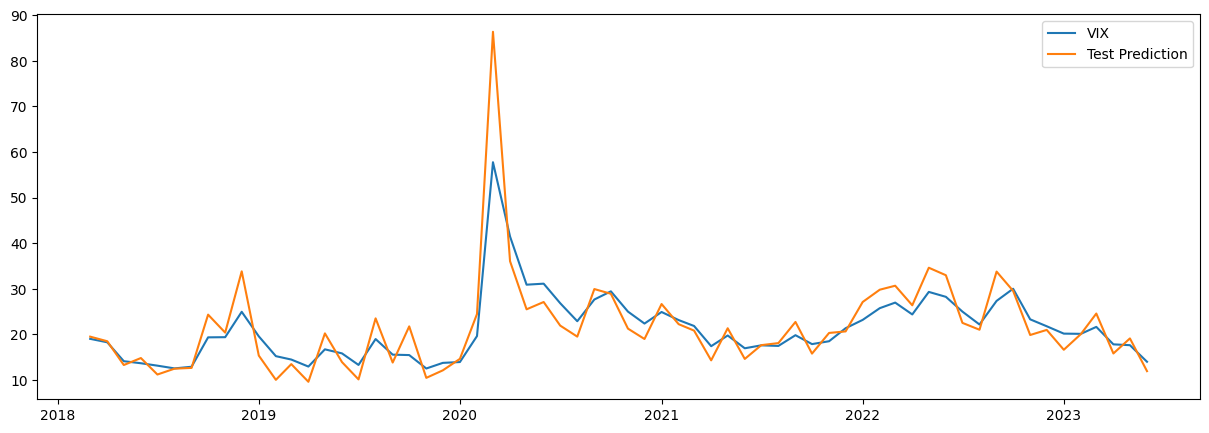

In [128]:
garch_predict(selected_features[13:], vix[13:], vix_data[13:])

## Random Forest

In [24]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from datetime import datetime
from sklearn.model_selection import GridSearchCV

In [25]:
x_train, x_test = train_test_split(selected_features[13:329], train_size=0.8, shuffle=False)
y_train, y_test = train_test_split(vix[13:329], train_size=0.8, shuffle=False)

In [26]:
rf_1 = RandomForestRegressor(n_estimators=200, random_state=0).fit(x_train, y_train.values.ravel())
predictions = rf_1.predict(x_test)

mse = mean_squared_error(y_test, predictions)
print(mse)

27.322674636079036


In [27]:
grid_1 = {
    'n_estimators': [100,200,300,400,500],
    'max_features': ['sqrt','log2'],
    'max_depth' : [3,4,5,6,7],
    'random_state' : [0]
}
## show start time
print(datetime.now())
## Grid Search function
CV_rfr = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid_1, cv= 5)
CV_rfr.fit(x_train, y_train.values.ravel())
## show end time
print(datetime.now())

2024-01-02 00:38:36.590649
2024-01-02 00:41:16.680444


In [28]:
CV_rfr.best_params_

{'max_depth': 6,
 'max_features': 'sqrt',
 'n_estimators': 100,
 'random_state': 0}

In [29]:
CV_rfr.best_score_

-0.6790353252603092

In [30]:
rf_2 = RandomForestRegressor(n_estimators=100, random_state=0, max_depth=7, max_features='sqrt').fit(x_train, y_train.values.ravel())
predictions = rf_2.predict(x_test)

mse = mean_squared_error(y_test, predictions)
print('MSE:',mse)
print('RMSE:', mse**0.5)
mape = mean_absolute_percentage_error(y_test, predictions)
print('MAPE:',mape)
r2 = r2_score(y_test, predictions)
print('R-Sqaured:',r2)
da = mda(y_test.values.ravel(), predictions)
print('Directional Accuracy:',da)

MSE: 23.987920575067427
RMSE: 4.897746479256295
MAPE: 0.18617522509840528
R-Sqaured: 0.5497865944957488
Directional Accuracy: 0.6349206349206349


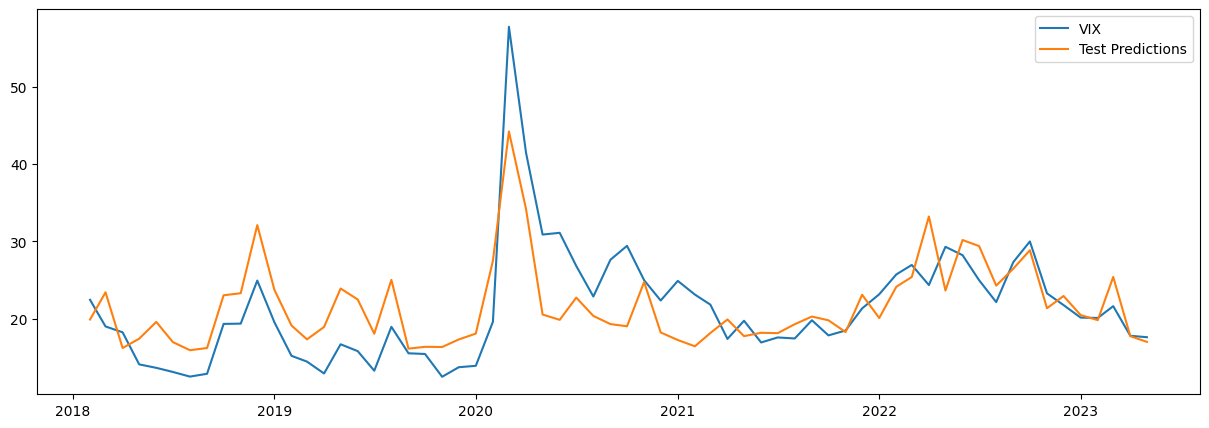

In [31]:
prediction_series = pd.Series(predictions,index=y_test.index)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(vix[265:329], label="VIX")
ax.plot(prediction_series, label="Test Predictions")
plt.legend()
plt.show()

## LSTM

In [32]:
selected_features = exog_var[['BAMLC0A4CBBB', 'TB3MS', 'SPX return', 'UNRATE', 'UMCSENT', 'CBOE SP500 Put Volume']]
selected_features.head()

,BAMLC0A4CBBB,TB3MS,SPX return,UNRATE,UMCSENT,CBOE SP500 Put Volume
DATE,,,,,,
1996-01-01,NaN,NaN,0.032617,NaN,NaN,0.378490
1996-02-01,NaN,-0.034000,0.006934,-0.017857,-0.008959,0.128849
1996-03-01,NaN,0.026915,0.007917,0.000000,0.058757,-0.086021
1996-04-01,NaN,-0.002016,0.013431,0.018182,-0.010672,-0.190592
1996-05-01,NaN,0.014141,0.022853,0.000000,-0.035599,0.000953


In [33]:
vix_diff = vix.copy()
vix_diff['VIXCLS'] = vix['VIXCLS'].diff()
vix.head()

,VIXCLS
DATE,
1996-01-01,13.473636
1996-02-01,15.033000
1996-03-01,17.762381
1996-04-01,16.575238
1996-05-01,16.146364


<Axes: xlabel='DATE'>

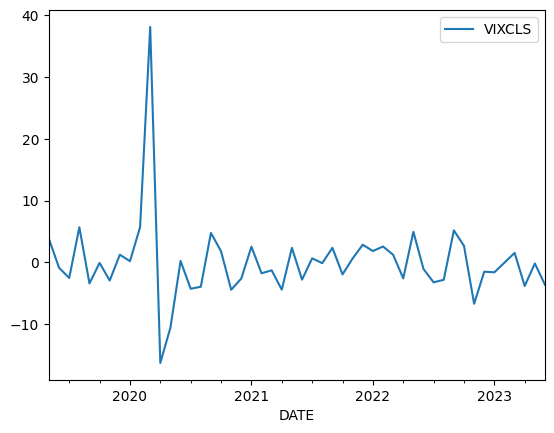

In [34]:
vix_diff[-50:].plot()

In [35]:
selected_features['VIX (T-1)'] = vix_diff['VIXCLS'].shift(1)
selected_features['VIX (T-2)'] = vix_diff['VIXCLS'].shift(2)
selected_features['VIX (T-3)'] = vix_diff['VIXCLS'].shift(3)
selected_features['VIX (T-12)'] = vix_diff['VIXCLS'].shift(12)

<ipython-input-35-a815fbe9c9e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features['VIX (T-1)'] = vix_diff['VIXCLS'].shift(1)
<ipython-input-35-a815fbe9c9e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features['VIX (T-2)'] = vix_diff['VIXCLS'].shift(2)
<ipython-input-35-a815fbe9c9e5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(selected_features[13:329], train_size=0.8, shuffle=False)
y_train, y_test = train_test_split(vix_diff[13:329], train_size=0.8, shuffle=False)
X_train = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(252, 1, 10) (252, 1) (64, 1, 10) (64, 1)


In [37]:
X_train.shape

(252, 1, 10)

In [38]:
import tensorflow as tf

In [39]:
stacked_lstm = tf.keras.Sequential(
    layers=[
        tf.keras.layers.LSTM(128, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
        tf.keras.layers.LSTM(64, activation='tanh', return_sequences=True),
        tf.keras.layers.LSTM(64, activation='tanh', return_sequences=True),
        tf.keras.layers.LSTM(32, activation='tanh', return_sequences=True),
        tf.keras.layers.LSTM(32, activation='tanh'),
        tf.keras.layers.Dense(1)
            ]
)
stacked_lstm.compile(optimizer='adam', loss='mse')
history = stacked_lstm.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test), verbose=2, shuffle=False, batch_size=5)

Epoch 1/60
51/51 - 17s - loss: 15.4114 - val_loss: 39.5590 - 17s/epoch - 335ms/step
Epoch 2/60
51/51 - 1s - loss: 15.3171 - val_loss: 38.9026 - 575ms/epoch - 11ms/step
Epoch 3/60
51/51 - 1s - loss: 14.6033 - val_loss: 37.8337 - 605ms/epoch - 12ms/step
Epoch 4/60
51/51 - 1s - loss: 13.9102 - val_loss: 36.9724 - 602ms/epoch - 12ms/step
Epoch 5/60
51/51 - 1s - loss: 13.2022 - val_loss: 36.3525 - 611ms/epoch - 12ms/step
Epoch 6/60
51/51 - 1s - loss: 12.3347 - val_loss: 34.8690 - 588ms/epoch - 12ms/step
Epoch 7/60
51/51 - 1s - loss: 11.5389 - val_loss: 33.4539 - 941ms/epoch - 18ms/step
Epoch 8/60
51/51 - 2s - loss: 10.9203 - val_loss: 32.5064 - 2s/epoch - 33ms/step
Epoch 9/60
51/51 - 2s - loss: 10.5300 - val_loss: 31.2645 - 2s/epoch - 34ms/step
Epoch 10/60
51/51 - 2s - loss: 9.6613 - val_loss: 29.3937 - 2s/epoch - 31ms/step
Epoch 11/60
51/51 - 1s - loss: 8.8958 - val_loss: 29.6195 - 1s/epoch - 26ms/step
Epoch 12/60
51/51 - 1s - loss: 8.1884 - val_loss: 28.9152 - 1s/epoch - 28ms/step
Epoch 1

In [40]:
stacked_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 128)            71168     
                                                                 
 lstm_1 (LSTM)               (None, 1, 64)             49408     
                                                                 
 lstm_2 (LSTM)               (None, 1, 64)             33024     
                                                                 
 lstm_3 (LSTM)               (None, 1, 32)             12416     
                                                                 
 lstm_4 (LSTM)               (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 174369 (681.13 KB)
Trainable params: 17436

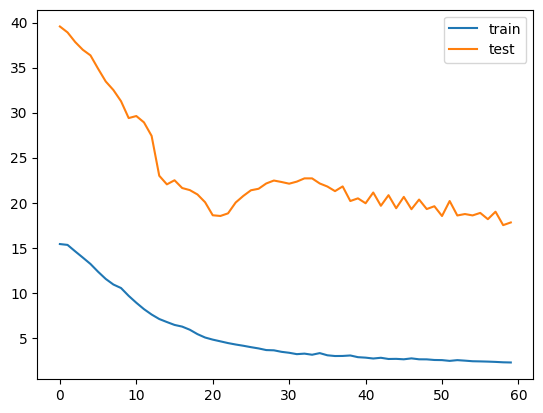

In [41]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [42]:
# Evaluate the model
loss = stacked_lstm.evaluate(X_test, y_test)
print('Test loss:', loss)

# Make predictions
predictions = stacked_lstm.predict(X_test)
a = predictions[:, 0] + vix.iloc[265,0]
print(a)
print('MAPE: ', mean_absolute_percentage_error(vix.iloc[265:329, 0], a))
print('RMSE: ', mean_squared_error(vix.iloc[265:329, 0], a)**0.5)
da = np.sum(np.sign(predictions) == np.sign(y_test))/ (len(y_test) - 1)
print('Directional Accuracy: ', da)
r2 = r2_score(vix.iloc[265:329, 0], a)
print('R2-Score: ', r2)

2/2 [==============================] - 0s 17ms/step - loss: 17.8085
Test loss: 17.808456420898438
2/2 [==============================] - 2s 11ms/step
[24.18505  20.776438 20.871365 16.374613 22.359192 21.354813 23.502579
 22.799562 25.248732 21.417406 30.475437 14.783752 23.049067 18.678831
 20.361694 25.537464 20.635727 18.022085 24.992632 19.145485 27.214172
 18.804615 21.917423 22.551445 28.18567  41.04039  19.887949 20.7946
 14.527435 20.542364 25.225676 23.377974 20.265001 16.098713 19.712307
 23.449686 23.052347 23.121292 20.234995 25.083572 19.368572 22.482141
 20.835623 24.53606  20.382069 23.248707 20.859247 22.953278 23.349403
 23.255379 19.834831 24.877413 20.11437  20.10407  20.662695 24.68868
 17.300415 16.60268  21.12588  21.875904 23.017406 24.135727 21.254324
 23.033031]
MAPE:  0.27872682305032215
RMSE:  6.936349574064306
Directional Accuracy:  VIXCLS    0.793651
dtype: float64
R2-Score:  0.09699996980892733


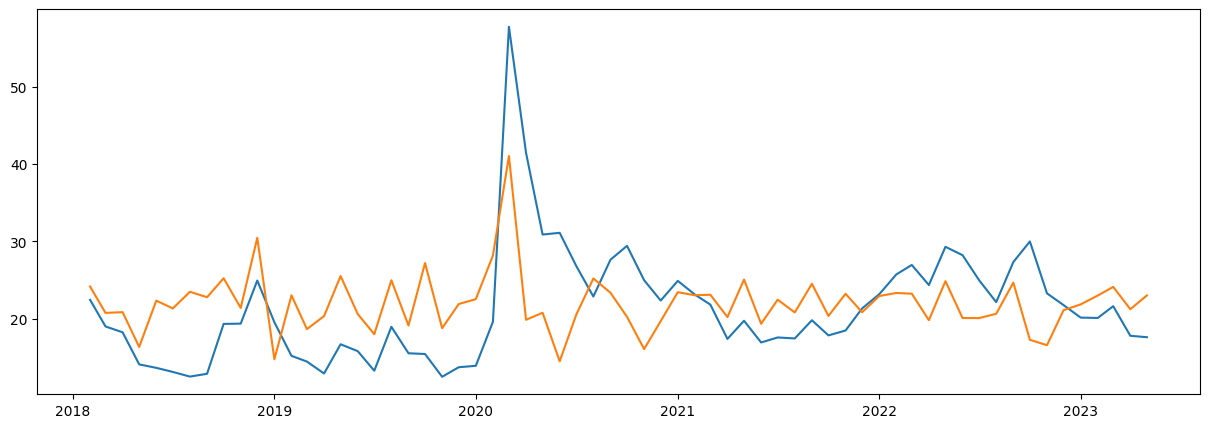

In [43]:
prediction_series = pd.Series(a,index=y_test.index)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(vix[265:329], label="VIX")
ax.plot(prediction_series, label="Test Predictions")
plt.show()

In [44]:
# Bi-Directional LSTM
bidirectional_lstm = tf.keras.Sequential(
    layers=[
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2]))),
        tf.keras.layers.Dense(1)
            ]
)
bidirectional_lstm.compile(optimizer='adam', loss='mse')
history = bidirectional_lstm.fit(X_train, y_train, epochs=130, validation_data=(X_test, y_test), verbose=2, shuffle=False)

Epoch 1/130
8/8 - 8s - loss: 15.4249 - val_loss: 39.1411 - 8s/epoch - 1s/step
Epoch 2/130
8/8 - 0s - loss: 15.2276 - val_loss: 38.9992 - 97ms/epoch - 12ms/step
Epoch 3/130
8/8 - 0s - loss: 15.0630 - val_loss: 38.8645 - 78ms/epoch - 10ms/step
Epoch 4/130
8/8 - 0s - loss: 14.9078 - val_loss: 38.7323 - 112ms/epoch - 14ms/step
Epoch 5/130
8/8 - 0s - loss: 14.7588 - val_loss: 38.6007 - 83ms/epoch - 10ms/step
Epoch 6/130
8/8 - 0s - loss: 14.6138 - val_loss: 38.4695 - 94ms/epoch - 12ms/step
Epoch 7/130
8/8 - 0s - loss: 14.4709 - val_loss: 38.3389 - 80ms/epoch - 10ms/step
Epoch 8/130
8/8 - 0s - loss: 14.3296 - val_loss: 38.2074 - 73ms/epoch - 9ms/step
Epoch 9/130
8/8 - 0s - loss: 14.1903 - val_loss: 38.0728 - 78ms/epoch - 10ms/step
Epoch 10/130
8/8 - 0s - loss: 14.0531 - val_loss: 37.9335 - 82ms/epoch - 10ms/step
Epoch 11/130
8/8 - 0s - loss: 13.9172 - val_loss: 37.7888 - 93ms/epoch - 12ms/step
Epoch 12/130
8/8 - 0s - loss: 13.7815 - val_loss: 37.6383 - 92ms/epoch - 12ms/step
Epoch 13/130
8/8 

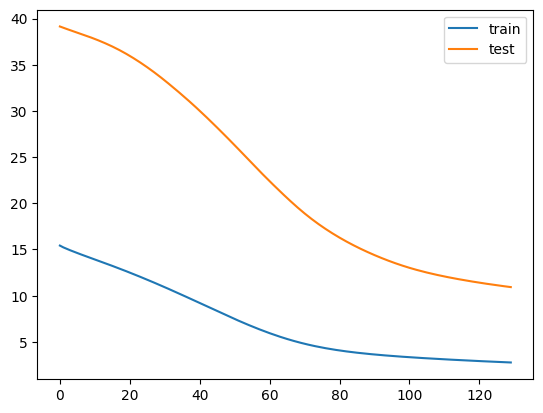

In [45]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [46]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
# Evaluate the model
loss = bidirectional_lstm.evaluate(X_test, y_test)
print('Test loss:', loss)

# Make predictions
predictions = bidirectional_lstm.predict(X_test)
a = predictions[:, 0] + vix.iloc[265,0]
print(a)
print('MAPE: ', mean_absolute_percentage_error(vix.iloc[265:329, 0], a))
print('RMSE: ', mean_squared_error(vix.iloc[265:329, 0], a)**0.5)
da = np.sum(np.sign(predictions) == np.sign(y_test))/ (len(y_test) - 1)
print('Directional Accuracy: ', da)
r2 = r2_score(vix.iloc[265:329, 0], a)
print('R2-Score: ', r2)

2/2 [==============================] - 0s 9ms/step - loss: 10.9296
Test loss: 10.929642677307129
2/2 [==============================] - 1s 10ms/step
[25.243193 20.209139 18.131802 19.661884 21.468168 20.99324  23.823606
 22.149931 26.851583 21.767073 27.96069  16.77679  20.87268  22.753504
 20.361217 24.78564  21.92445  19.284512 26.691027 21.340118 26.793142
 20.246527 21.885424 24.821575 25.764847 46.43518  17.105564 14.374904
 17.556915 21.001322 23.203886 23.733227 21.029972 20.480337 19.885225
 23.870499 21.987747 21.90314  22.791443 25.88611  19.225582 22.214737
 23.492962 24.907305 20.32527  22.99885  21.493967 21.932802 21.753931
 23.730885 19.277716 24.793919 25.590492 20.33289  20.720995 23.977352
 21.002504 19.032799 19.98719  22.603512 22.85578  24.644867 20.149334
 22.327429]
MAPE:  0.28280434870595084
RMSE:  6.8761536665355525
Directional Accuracy:  VIXCLS    0.714286
dtype: float64
R2-Score:  0.11260502034536779


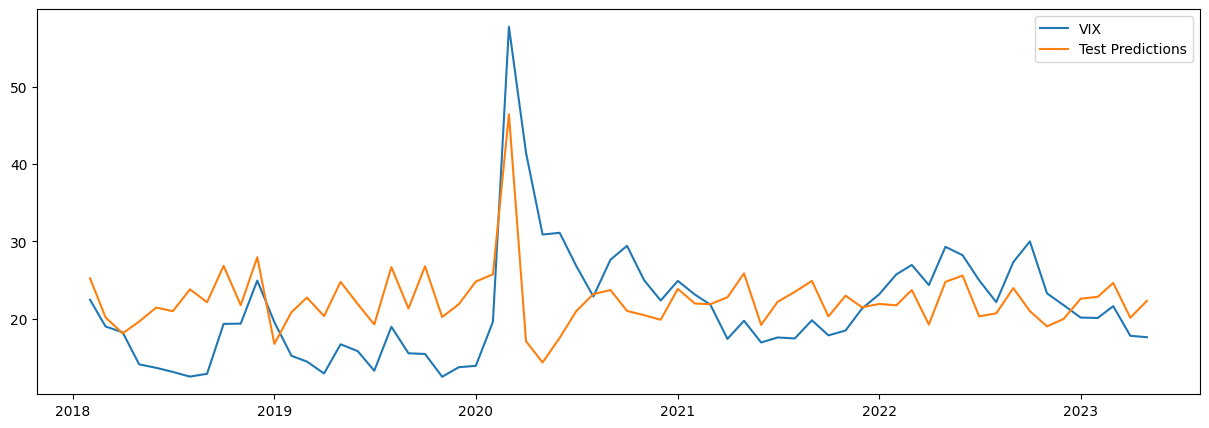

In [47]:
prediction_series = pd.Series(a,index=y_test.index)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(vix[265:329], label="VIX")
ax.plot(prediction_series, label="Test Predictions")
plt.legend()
plt.show()

## Neural Network

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop

In [49]:
x_train, x_test = train_test_split(selected_features[13:329], train_size=0.8, shuffle=False)
y_train, y_test = train_test_split(vix[13:329], train_size=0.8, shuffle=False)

2/2 [==============================] - 0s 11ms/step


2/2 [==============================] - 0s 9ms/step


2/2 [==============================] - 0s 11ms/step


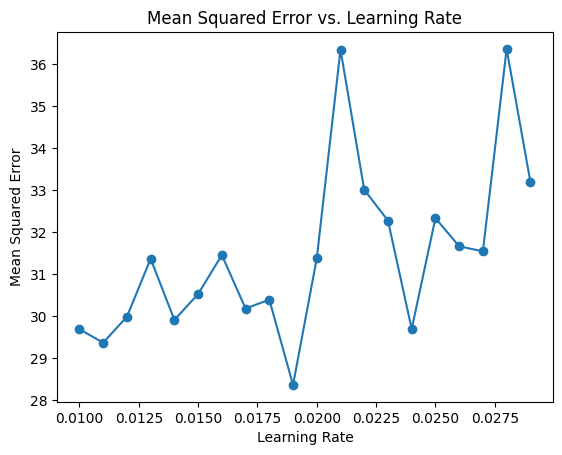

Optimal Learning Rate: 0.018999999999999993
Mean Squared Error at Optimal Learning Rate: 28.363869536945007


In [50]:
np.random.seed(123123)
def build_and_train_model(learning_rate):
    model = Sequential()
    model.add(Dense(units=64, activation='sigmoid', input_dim=x_train.shape[1]))
    model.add(Dropout(0.5))
    model.add(Dense(units=1, activation='linear'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)

    return mse


# Initialize learning rates
learning_rates = np.arange(0.01, 0.03, 0.001)

# Train the model for each learning rate and store MSE values
mse_values = []
for lr in learning_rates:
    mse = build_and_train_model(lr)
    mse_values.append(mse)

# Find the optimal learning rate
optimal_lr_index = np.argmin(mse_values)
optimal_lr = learning_rates[optimal_lr_index]
optimal_mse = mse_values[optimal_lr_index]

# Plot MSE values for each learning rate
plt.plot(learning_rates, mse_values, marker='o')
plt.title('Mean Squared Error vs. Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Mean Squared Error')
plt.show()

# Print the optimal learning rate and corresponding MSE
print(f"Optimal Learning Rate: {optimal_lr}")
print(f"Mean Squared Error at Optimal Learning Rate: {optimal_mse}")

In [51]:
print(f"Root Mean Squared Error at Optimal Learning Rate: {optimal_mse**0.5}")

Root Mean Squared Error at Optimal Learning Rate: 5.325774078661712
